In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Tejasvi\Desktop\Simple-Regression-using-LR-and-DT-main\Salary_Data.csv")

In [3]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


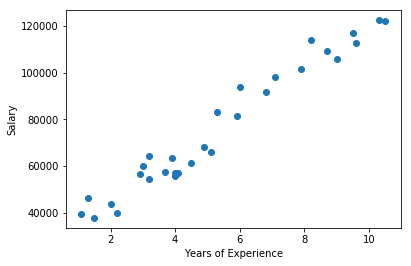

In [4]:
plt. scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state = 101)

In [10]:
X_train

array([[ 3.9],
       [ 2. ],
       [ 1.3],
       [ 6. ],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ]])

In [11]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [12]:
y_train

array([ 63218.,  43525.,  46205.,  93940., 101302.,  56957.,  56642.,
        61111.,  39343.,  98273.,  39891.,  64445.,  57081.,  57189.,
        67938., 121872., 113812.,  60150.,  83088.,  55794.])

In [13]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [17]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [18]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
prediction_LR=LR.predict(X_test)

In [20]:
prediction_LR

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [24]:
diff_LR= y_test-prediction_LR

In [25]:
res_df = pd.concat([pd.Series(prediction_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns =['Prediciton','Original Data','Diff']

In [26]:
res_df

,Prediciton,Original Data,Diff
0,91477.927966,91738.0,260.072034
1,109893.228025,109431.0,-462.228025
2,56585.780487,54445.0,-2140.780487
3,82754.891096,81363.0,-1391.891096
4,40108.933066,37731.0,-2377.933066
5,118616.264895,112635.0,-5981.264895
6,117647.038576,116969.0,-678.038576
7,75001.080545,66029.0,-8972.080545
8,112800.906981,105582.0,-7218.906981
9,125400.849127,122391.0,-3009.849127


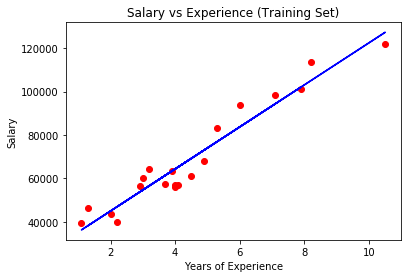

In [30]:
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train, LR.predict(X_train),color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
#Matrics

In [39]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction_LR))
R2 = metrics.r2_score(y_test, prediction_LR)

In [38]:
rmse

4363.043260343273

In [40]:
R2

0.974811112371526

In [42]:
#Testing our model#

LR.predict([[5]])

array([74031.85422627])

# Decision Tree Model

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
DT=DecisionTreeRegressor()

In [47]:
DT.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [48]:
y_pred_DT = DT.predict(X_test)

In [49]:
y_pred_DT

array([ 98273., 113812.,  64445.,  93940.,  46205., 121872., 121872.,
        67938., 113812., 121872.])

In [50]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [51]:
diff_DT = y_test-y_pred_DT

In [53]:
res_DT = pd.concat([pd.Series(y_pred_DT),pd.Series(y_test),pd.Series(diff_DT)],axis=1)
res_DT.columns =['Prediciton','Original Data','Diff']

In [54]:
res_DT

,Prediciton,Original Data,Diff
0,98273.0,91738.0,-6535.0
1,113812.0,109431.0,-4381.0
2,64445.0,54445.0,-10000.0
3,93940.0,81363.0,-12577.0
4,46205.0,37731.0,-8474.0
5,121872.0,112635.0,-9237.0
6,121872.0,116969.0,-4903.0
7,67938.0,66029.0,-1909.0
8,113812.0,105582.0,-8230.0
9,121872.0,122391.0,519.0


In [55]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [56]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT))
R2 = metrics.r2_score(y_test, y_pred_DT)

In [57]:
rmse

7568.996703658947

In [58]:
R2

0.9241934760377903

In [65]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [66]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names = df['Years of Expereience'],filled=True)
plt.show()

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

<Figure size 1800x1440 with 0 Axes>

Requirement not upgraded as not directly required: scikit-learn in c:\programdata\anaconda3\lib\site-packages (from sklearn) (0.19.1)
  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\Tejasvi\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.3b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0.19.1


AssertionError: sklearn version insufficient.